<H1>TP 1 - Analyse d'un jeu de données</H1>

Nous allons dans ce TP analyser le jeu de données Titanic qui est très largement utilisé dans la communauté. Il concerne les informations concernant les personnes qui étaient à bord du Titanic.  
Les différentes colonnes sont les suivantes :  
    survival: Survival (0 = No; 1 = Yes)  
    pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
    name: Name  
    sex: Sex  
    age: Age  
    sibsp: Number of Siblings/Spouses Aboard  
    parch: Number of Parents/Children Aboard  
    ticket: Ticket Number  
    fare: Passenger Fare  
    cabin: Cabin  
    embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## **Installation**



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.

In [6]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...


#!pip install ..

# ne pas oublier de relancer le kernel du notebook

In [7]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

Pour pouvoir lire et sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire google drive : 

In [9]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML_FDS'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/ML_FDS


'/content/gdrive/My Drive/Colab Notebooks/ML_FDS'

## **Travaux pratiques**

**Lecture du fichier**  
Récupérer le fichier titanic.csv et le mettre dans le répertoire Dataset.  
Intégrer le contenu de ce fichier dans un dataframe pandas.

In [10]:
import pandas as pd

#attention le séparateur est une tabulation
df=pd.read_csv('titanic.csv', 
               sep='\t')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


## Analyse des données

L'objectif dans un premier temps est de se familiariser avec pandas pour obtenir des informations sur le jeu de données.  

**Pandas**  

Afficher la taille du dataframe, les six premières lignes, les trois dernières lignes et 5 lignes au hasard du dataframe.

In [11]:
print ("taille du dataframe : \n")
display(df.shape)

print ("Six premières lignes du dataframe : \n")
display(df.head(6))
print ("\n Trois dernières lignes du dataframe : \n")
display(df.tail(3))
print ("\n Cinq lignes au hasard du dataframe : \n")
display(df.sample(5))

taille du dataframe : 



(156, 12)

Six premières lignes du dataframe : 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q



 Trois dernières lignes du dataframe : 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C



 Cinq lignes au hasard du dataframe : 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S


Donner les informations sur le cinquième passager

In [12]:
# attention là si on passe par 
#le numéro d'index donc il faut utilser iloc
# la numérotation des index commence à zéro
print (df.iloc[4])
# ou en passant par les colonnes
print (df.loc[4])

PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                  35
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object
PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                  35
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: o

Donner toutes les informations sur les passagers compris entre les lignes 10 et 16 

In [13]:
display(df.iloc[10:17])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


Donner les informations sur le passager dont le numéro (PassengerId) est 5

In [14]:
print (df[df['PassengerId']==5])

   PassengerId  Survived  Pclass  ...  Fare Cabin  Embarked
4            5         0       3  ...  8.05   NaN         S

[1 rows x 12 columns]


Indiquer les différentes informations associées aux colonnes (Nom des colonnes, type de la colonne, place prise par le dataframe, etc). 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


Quel est le type de la colonne *Name* ?

In [16]:
print (df['Name'].dtype)

object


Donner des statistiques de base du dataframe et préciser pourquoi Name n'apparait pas dans le résultat.

In [17]:
df.describe()
# describe ne considère que des attributs 
#numériques. Name est un objet (un str)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


Donner le nombre de survivants? Indication il faut compter combien de PassagerId ont survécu. 

In [18]:
nb=df[df['Survived']==1]
print ("Nombre de survivants : ",
       nb['PassengerId'].count())

Nombre de survivants :  54


Donner par categorie male/female le nombre de personnes qui ont ou n'ont pas survécu. Indication utilisation d'un groupby.

In [19]:
g=df.groupby(['Sex','Survived'])
print (g['PassengerId'].count())

Sex     Survived
female  0           16
        1           40
male    0           86
        1           14
Name: PassengerId, dtype: int64


Donner par categorie de classe le nombre de personnes qui ont ou n'ont pas survécu.

In [20]:
g=df.groupby(['Pclass','Survived'])
print (g['PassengerId'].count())

Pclass  Survived
1       0           18
        1           12
2       0           16
        1           14
3       0           68
        1           28
Name: PassengerId, dtype: int64


Donner par categorie de classe et de sexe le nombre de personnes qui ont ou n'ont pas survécu.

In [21]:
g=df.groupby(['Pclass','Sex','Survived'])
print (g['PassengerId'].count())

Pclass  Sex     Survived
1       female  1            9
        male    0           18
                1            3
2       female  0            1
                1           11
        male    0           15
                1            3
3       female  0           15
                1           20
        male    0           53
                1            8
Name: PassengerId, dtype: int64


Donner la liste des femmes qui ont survécu et dont l'age est supérieure à 30

In [22]:
print(df.loc[(df["Sex"]=="female") &
             (df["Survived"]==1)&
             (df["Age"]>30)] )

#ou bien 
print ("\n autre version sans loc:\n")
print (df[(df["Sex"]=="female") & 
          (df["Survived"]==1)& 
          (df["Age"]>30)] )

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
1              2         1       1  ...  71.2833   C85         C
3              4         1       1  ...  53.1000  C123         S
11            12         1       1  ...  26.5500  C103         S
15            16         1       2  ...  16.0000   NaN         S
25            26         1       3  ...  31.3875   NaN         S
52            53         1       1  ...  76.7292   D33         C
61            62         1       1  ...  80.0000   B28       NaN
85            86         1       3  ...  15.8500   NaN         S
98            99         1       2  ...  23.0000   NaN         S
123          124         1       2  ...  13.0000  E101         S

[10 rows x 12 columns]

 autre version sans loc:

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
1              2         1       1  ...  71.2833   C85         C
3              4         1       1  ...  53.1000  C123         S
11            12         1       1  ...

Donner l'age max, min et moyen des personnes qui ont survécu

In [23]:
df2=df[df['Survived']==1]
print ("Age max : ",df2['Age'].max())
print ("\nAge min : ",df2['Age'].min())
print ("\nAge moyen : ",df2['Age'].mean())


# ou bien 
print ("\nAge moyen : ",
       (df[df['Survived']==1])['Age'].mean())

Age max :  58.0

Age min :  0.83

Age moyen :  25.61780487804878

Age moyen :  25.61780487804878


## Visualisation 


L'objectif est ici de visualiser quelques informations à l'aide de seaborn pour mettre en évidence les premières analyses précédentes.  

Dans un premier temps à l'aide de seaborn et de la fonction countplot afficher le nombre de survivants et de non survivants

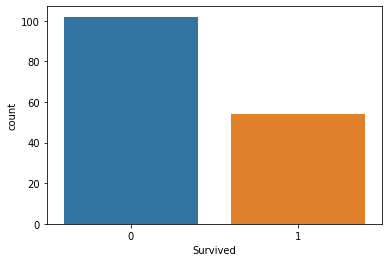

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)

Afficher le nombre de catégorie male/female (attribut Sex) avec countplot.

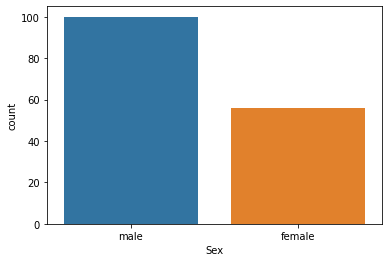

In [25]:
sns.countplot(x='Sex', data=df)

La commande suivante affiche les survivants ou non en fonction du sexe.  

sns.factorplot(x='Survived', col='Sex', kind='count', data=df)  

Essayer de l'utiliser et faire de même par rapport aux attributs Pclass et Embarked. Que pouvez vous déduire dans un premier temps sur les survivants ou non.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


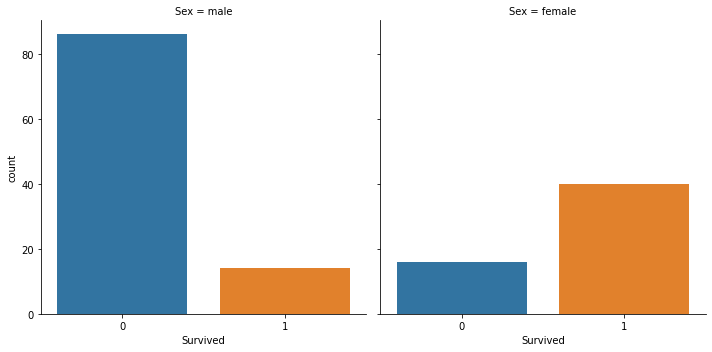

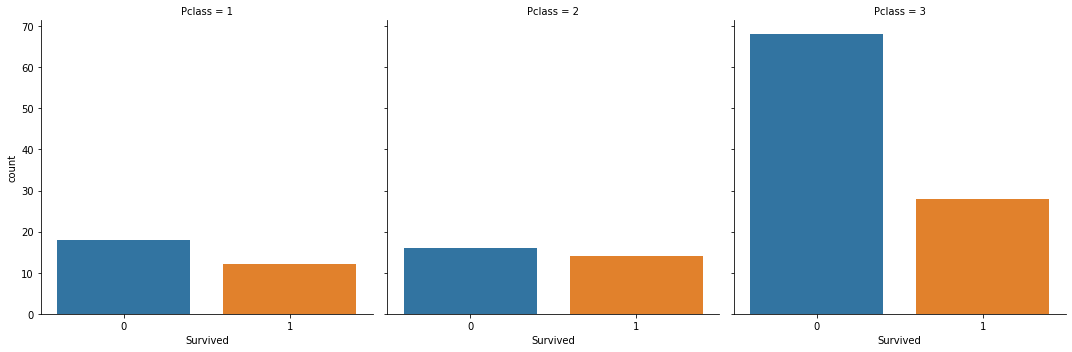

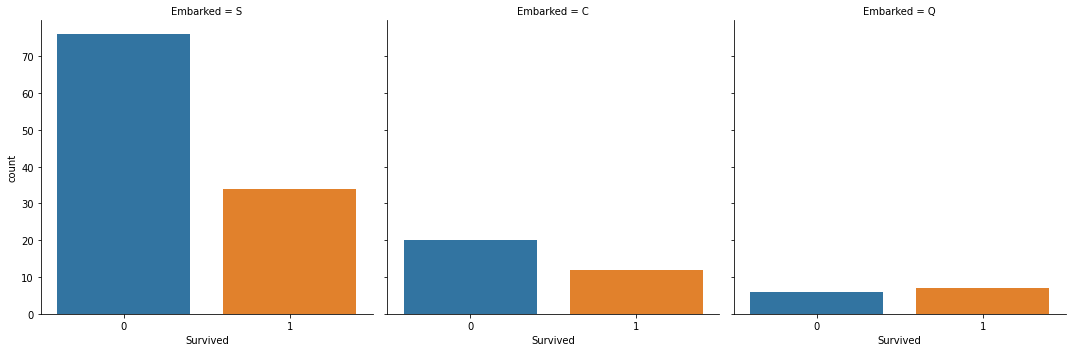

In [26]:
sns.factorplot(x='Survived', 
               col='Sex', 
               kind='count', data=df)

sns.factorplot(x='Survived', 
               col='Pclass', 
               kind='count', data=df)


sns.factorplot(x='Survived', 
               col='Embarked', 
               kind='count', data=df)

#il y moins de survivants homme, 
#pas terrible la troisième classe, 
#il valait mieux ne pas embarquer à Southampton


Un peu plus loin sur l'analyse ...  

Le code suivant permet de connaître la répartition par sexe et par classe :  
g = sns.factorplot('Pclass', data=df, hue='Sex', kind='count')  
g.set_xlabels('Class')

Exécuter le code. Que constatez vous ? Faire la même chose pour Embarked

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


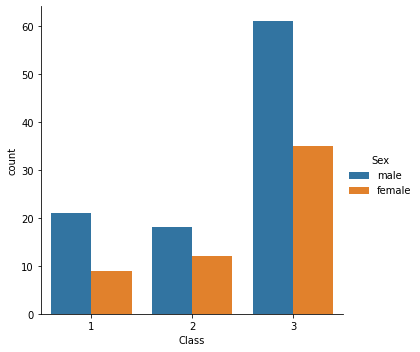

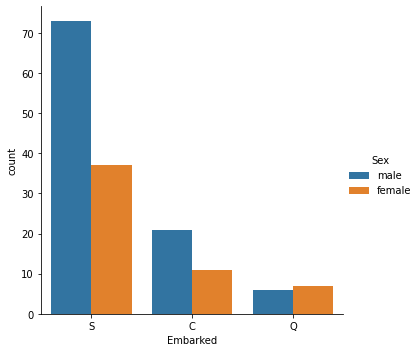

In [27]:
g = sns.factorplot('Pclass', 
                   data=df, 
                   hue='Sex', 
                   kind='count')
g.set_xlabels('Class')

# plus de male en classe 3

g = sns.factorplot('Embarked', 
                   data=df, hue='Sex', 
                   kind='count')
g.set_xlabels('Embarked')

# plus de male de Southampton

A votre factor plot ajouter col='Survived' comme paramètre pour voir la répartition par rapport au sexe des passagers. Faites de même par rapport à Embarked.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


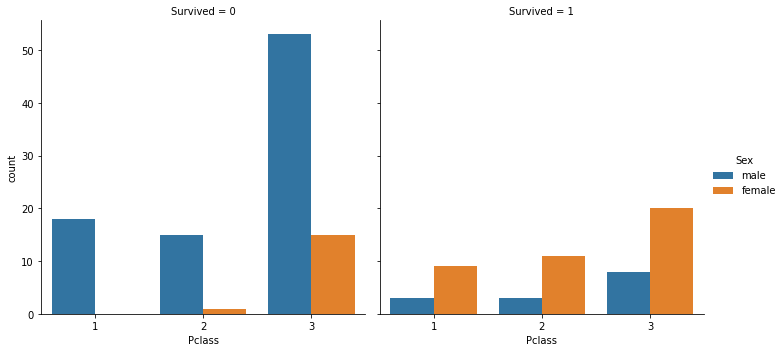

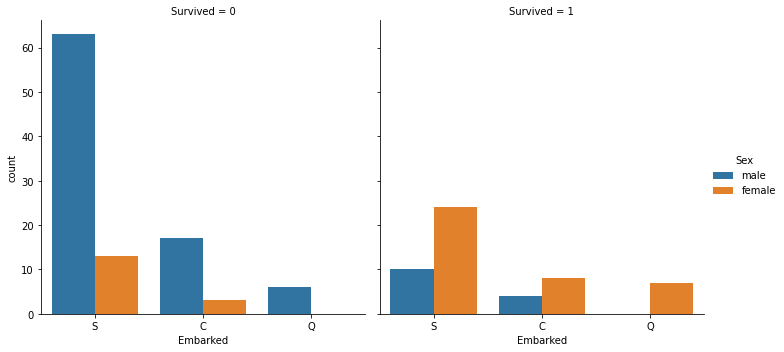

In [28]:
sns.factorplot('Pclass', 
               data=df, 
               kind='count', 
               hue='Sex', 
               col='Survived')


sns.factorplot('Embarked', 
               data=df, 
               hue='Sex', 
               kind='count', 
               col='Survived')


Créer la fonction suivante qui permet de créer des catégories en fonction de l'age des personnes.
    Ajouter dans df une colonne 'Person' qui contient la valeur de cet attribut.  
    
    def male_female_age(passenger):  
         age, sex = passenger  
         if age < 5:  
             return 'Baby'  
         if age >= 5 and age < 12:  
             return 'Child'  
         if age >= 12 and age < 18:  
             return 'Teneeger'  
         if age >=18 and age < 35:  
             return 'Young Adult'  
         if age >= 35 and age < 60:  
             return 'Adult'  
         if age >= 60:  
             return 'Senior'  
         else:  
             return sex  
    
    Rappel : pour appliquer une fonction à une colonne   
        df[['Age', 'Sex']].apply(male_female_child, axis=1)
        

In [29]:
def male_female_age(passenger):
    age, sex = passenger
    if age < 5:
        return 'Baby'
    if age >= 5 and age < 12:
        return 'Child'
    if age >= 12 and age < 18:
        return 'Teneeger'
    if age >=18 and age < 35:
        return 'Young Adult'
    if age >= 35 and age < 60:
        return 'Adult'
    if age >= 60:
        return 'Senior'
    else:
        return sex

In [30]:

df['Person']=df[['Age','Sex']].apply(male_female_age, 
                                     axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


Sur vos factorplot précédents remplacer hue='Sex' par hue='Person' et relancer les. Que constatez vous ? 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


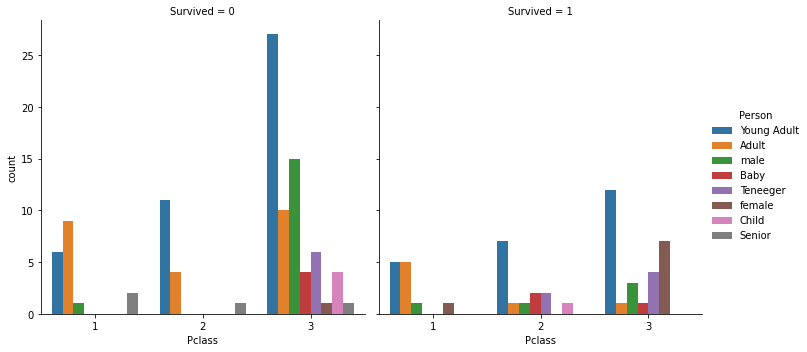

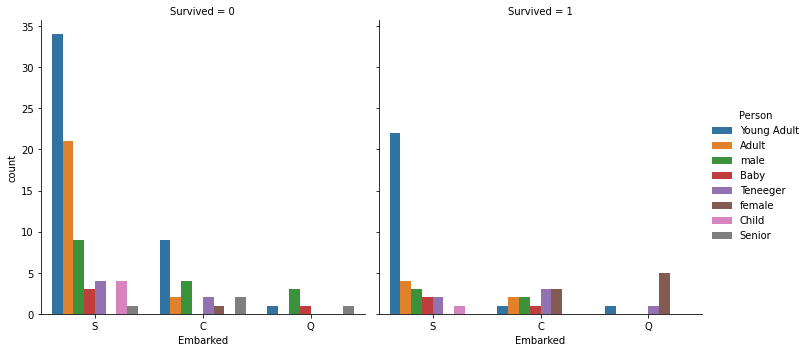

In [31]:
sns.factorplot('Pclass', 
               data=df, 
               kind='count', 
               hue='Person', 
               col='Survived')


sns.factorplot('Embarked', 
               data=df, 
               hue='Person', 
               kind='count', 
               col='Survived')

#les enfants de troisième classe !

Enfin regarder la répartition pour les embarquements et les classes.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


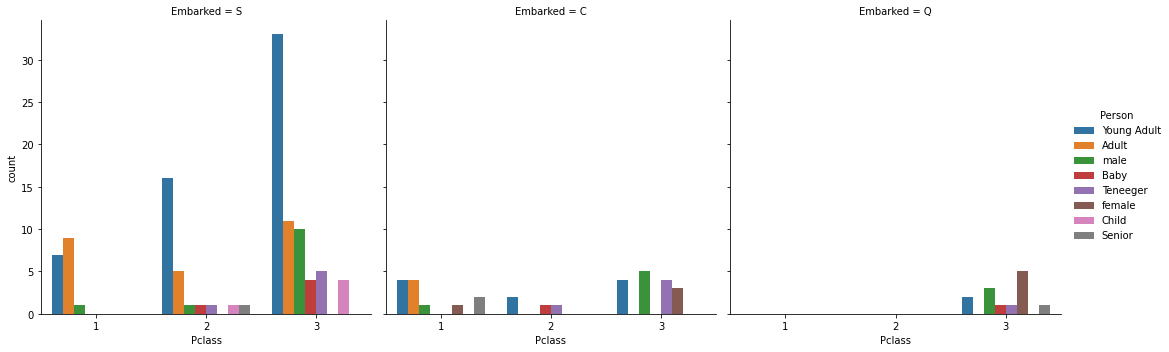

In [32]:
sns.factorplot('Pclass', data=df, 
               kind='count', 
               hue='Person', col='Embarked')

#Les troisièmes classes ont majoritairement embarquer à Southtampton

Quelques informations sur la distribution. A l'aide de displot afficher la distribution de Pclass et de Fare.

Text(0.5, 1.0, 'Distribution des classes')

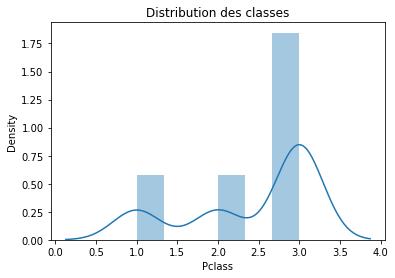

In [33]:
pclass_dist=sns.distplot(df["Pclass"])
pclass_dist.set_title("Distribution des classes")



Text(0.5, 1.0, 'Distribution des tarifs')

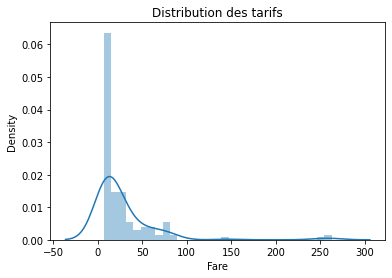

In [34]:
fare_dist=sns.distplot(df["Fare"])
fare_dist.set_title("Distribution des tarifs")



Afficher à l'aide de la fonction boxplot une boîte à moustache pour Pclass et Fare.



/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


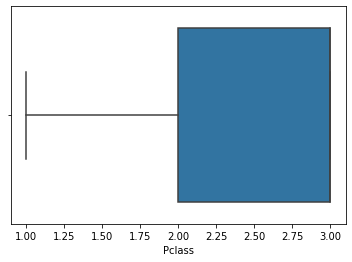

In [35]:
sns.boxplot(x=df["Pclass"], orient='v')


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


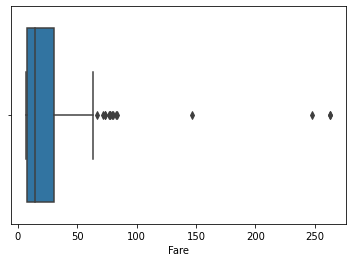

In [36]:
sns.boxplot(x=df["Fare"], orient='v')

Faire les mêmes opérations à l'aide de la fonction violinplot.  
Rappel : elle offre les mêmes fonctionnalités que les boîtes à moustache mais en plus offre des informations sur une estimation de la densité. 

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


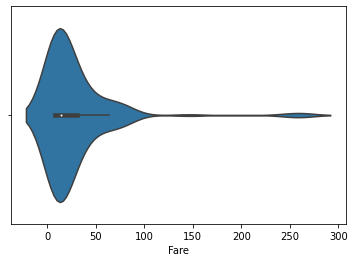

In [37]:
sns.violinplot(x=df["Fare"], orient='v')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


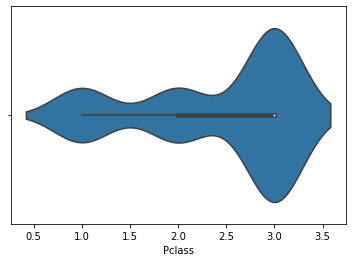

In [38]:
sns.violinplot(x=df["Pclass"], orient='v')

A présent, considérons l'age des personnes. A l'aide de displot afficher l'histogramme de distribution des ages avec le code suivant :  

age_dist=sns.distplot(df["Age"])  
age_dist.set_title("Distribution des ages")  

Que se passe-t'il ? 


Une erreur est levée "cannot convert float NaN to integer". NaN indique la présence de valeurs manquantes dans le jeu de données.

## Ingénierie des données 

**Traitement des valeurs manquantes**

Créer un nouveau dataframe df2 (pour créer un dataframe sans modifier le dataframe initial il faut en faire une copie : df2=df.copy()).   



In [39]:
df2=df.copy()

Donner la liste des colonnes pour lesquelles il y a des valeurs manquantes. Pour tester si une valeur est manquante, il est possible pour un dataframe d'utiliser pour une colonne la fonction isnull(). Attention celle-ci retourne un dataframe. Elle doit être suivie par any() pour avoir un booléen :  
        
        df ['colonne'].isnull().any()

In [40]:
for col in df2.columns:
    valeur=False
    valeur = df2[col].isnull().any()
    if valeur:
        print (col)

Age
Cabin
Embarked


Il est également possible d'afficher l'ensemble des données qui contiennent des valeurs NaN de la manière suivante : 
    
        
sns.heatmap(df.isnull(), cbar=False)

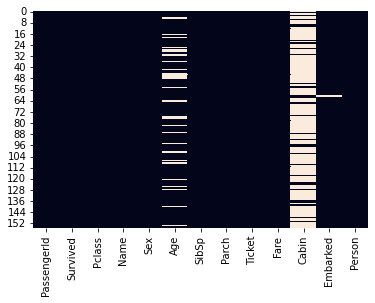

In [41]:
sns.heatmap(df2.isnull(), cbar=False)

Afficher le nombre de valeurs nulles Embarked, Cabin et Sex.


In [42]:

print ("Nombre de valeurs nulles pour Embarked : \n",
       df2['Embarked'].isnull().value_counts() )
print ("\nNombre de valeurs nulles pour Cabin : \n",
       df2['Cabin'].isnull().value_counts() )
print ("\nNombre de valeurs nulles pour Sex : \n",
       df2['Sex'].isnull().value_counts() )



Nombre de valeurs nulles pour Embarked : 
 False    155
True       1
Name: Embarked, dtype: int64

Nombre de valeurs nulles pour Cabin : 
 True     125
False     31
Name: Cabin, dtype: int64

Nombre de valeurs nulles pour Sex : 
 False    156
Name: Sex, dtype: int64


Remplacer les valeurs nulles de l'age par la moyenne des ages des passagers. Penser à vérifier que la transformation a bien été effectuée.

In [43]:
print ("Pour vérifier : \n")
print (df2.iloc[5])
moyenne_age = df2['Age'].mean()
print ("\n Moyenne age : \n", moyenne_age)
df2['Age']=df2['Age'].fillna(df2['Age'].mean())

print ("\nPour vérifier : \n",df2.iloc[5])



Pour vérifier : 

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Person                     male
Name: 5, dtype: object

 Moyenne age : 
 28.141507936507935

Pour vérifier : 
 PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                     28.1415
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Person                     male
Name: 5, dtype: object


Supprimer tous les enregistrements qui contiennent encore une valeur nulle.

In [44]:
print ("Pour vérification : \n")
print ("Nombre de valeurs nulles pour Embarked : \n",
       df2['Embarked'].isnull().value_counts() )
print ("\nNombre de valeurs nulles pour Cabin : \n",
       df2['Cabin'].isnull().value_counts() )

df2=df2.dropna()
print ("\nNombre de valeurs nulles pour Embarked : \n",
       df2['Embarked'].isnull().value_counts() )
print ("\nNombre de valeurs nulles pour Cabin : \n",
       df2['Cabin'].isnull().value_counts() )



Pour vérification : 

Nombre de valeurs nulles pour Embarked : 
 False    155
True       1
Name: Embarked, dtype: int64

Nombre de valeurs nulles pour Cabin : 
 True     125
False     31
Name: Cabin, dtype: int64

Nombre de valeurs nulles pour Embarked : 
 False    30
Name: Embarked, dtype: int64

Nombre de valeurs nulles pour Cabin : 
 False    30
Name: Cabin, dtype: int64


Utiliser sns.heatmap(df.isnull(), cbar=False) sur votre dataframe pour vérifier qu'il n'y a plus de valeurs nulles. 

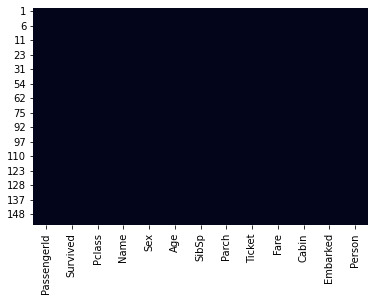

In [45]:
sns.heatmap(df2.isnull(), cbar=False)



Quelle est la taille de votre dataframa à présent ? Comparer le à la taille initiale.

In [46]:
print(df2.shape)

(30, 13)


En fait en supprimant les valeurs manquantes de cabines de trop nombreux enregristrements ont été effacés. Nous pouvons constater qu'il y a beaucoup de valeurs manquantes pour Cabin et que dans tous les cas elle ne va donc pas pouvoir aider à faire de la classification.  

Créer un nouveau dataframe df3=df.copy().  
Remplacer la valeur d'age par la médiane.  
Par simplification, supprimer la colonne Cabin.  
Rappel : pour supprimer une colonne df.drop('Nom colonne',1). Effacer les autres valeurs manquantes.   
Enfin, supprimer toutes les valeurs manquantes.  

Vérifier à l'aide de heatmap que votre jeu de données n'a plus de valeurs manquantes. Indiquer la taille du jeu de données. 


(155, 12)


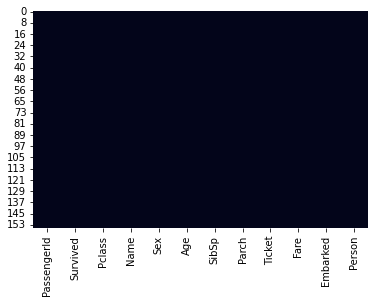

In [47]:
df3=df.copy()

df3 = df3.drop('Cabin', 1)

sns.heatmap(df3.isnull(), cbar=False)

df3['Age']=df3['Age'].fillna(df3['Age'].mean())

df3=df3.dropna()
sns.heatmap(df3.isnull(), cbar=False)
print(df3.shape)

Afficher à présent l'histogramme des ages.

Text(0.5, 1.0, 'Distribution des ages')

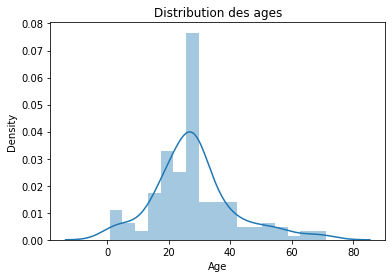

In [48]:
age_dist=sns.distplot(df3["Age"])
age_dist.set_title("Distribution des ages")

**Suppression des colonnes inutiles**

Dans cette étape il convient de supprimer les colonnes qui ne seront pas utiles pour la classification. 
La question à se poser est pour chaque colonne : est ce que cela a un sens de la conserver ?   
Il faut faire des choix qui peut être auront une conséquence sur la classification !!
    
Dans le jeu de données nous voyons qu'il n'y a sans doute pas d'intérêt de conserver le numéro de ticket car il ne semble pas qu'il y ait un codage particulier.  
Le nom des passager semble inutile. Pourtant si l'on regarde un peu attentivement (df3.display()) on peut se rendre compte qu'il existe des titres différents (Mr., Master, Miss, Rev., Mrs. etc) qui pourraient avoir un impact sur la classification.  
L'identifiant du passager n'apporte pas d'information.  

Effacer les différentes colonnes : 'Ticket', 'Name' et 'PassengerId'.

    

In [49]:
df3=df3.drop(['Ticket', 'Name', 'PassengerId'], 
             axis=1)

Un petit retour sur la colonne Person.  
A l'aide de display(df3.iloc[131] que constatez vous ? 

In [50]:

display (df3.iloc[131])


Survived         0
Pclass           3
Sex         female
Age             47
SibSp            1
Parch            0
Fare          14.5
Embarked         S
Person       Adult
Name: 132, dtype: object

La fonction ayant été appliquée avant le traitement des valeurs manquantes toutes celles qui étaient manquantes ont été remplacées par le sexe de la personne. Supprimer la colonne Person.

In [51]:
df3=df3.drop(['Person'], axis=1)

** Attributs continus **

Il y a deux attributs continus dans le jeu de données. Age et Fare.  

Transformer à l'aide de la fonction cut l'attribut Age de manière à ce que les valeurs puissent prendre en compte les valeurs suivantes : 
   bins = (0, 5, 12, 18, 25, 35, 60, 120)  
   group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']   

Transformer à l'aide de la fonction cut l'attribut Fare de manière à ce que les valeurs puissent prendre en compte les valeurs suivantes : 
    bins = (0, 8, 15, 31, 1000)  
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile']



In [52]:
bins = (0, 5, 12, 18, 25, 35, 60, 120)
#Attention le nombre de label doit être inférieur au nombre de bins
group_names = ['Baby', 'Child', 'Teenager', 
               'Student', 'Young Adult', 
               'Adult', 'Senior']
df3['Age']= pd.cut(df3['Age'], 
                   bins, labels=group_names)



bins = (0, 8, 15, 31, 1000)
#Attention le nombre de label doit être inférieur au nombre de bins
group_names = ['1_quartile', '2_quartile', 
               '3_quartile', '4_quartile']
df3['Fare']= pd.cut(df3['Fare'], 
                    bins, labels=group_names)

print (df3.head())

   Survived  Pclass     Sex          Age  SibSp  Parch        Fare Embarked
0         0       3    male      Student      1      0  1_quartile        S
1         1       1  female        Adult      1      0  4_quartile        C
2         1       3  female  Young Adult      0      0  1_quartile        S
3         1       1  female  Young Adult      1      0  4_quartile        S
4         0       3    male  Young Adult      0      0  2_quartile        S


** Attribut catégoriel**


Pour connaître les attributs catégoriels faire un df.info(). Les attributs catégoriels apparaissent avec comme type object ou category.

In [53]:

print (df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  155 non-null    int64   
 1   Pclass    155 non-null    int64   
 2   Sex       155 non-null    object  
 3   Age       155 non-null    category
 4   SibSp     155 non-null    int64   
 5   Parch     155 non-null    int64   
 6   Fare      155 non-null    category
 7   Embarked  155 non-null    object  
dtypes: category(2), int64(4), object(2)
memory usage: 9.3+ KB
None


Il y a 4 attributs catégoriels à présent dans le jeu de données. Pour chacun d'entre eux transformer les en valeur numérique à l'aide de la fonction LabelEncoder().

In [54]:
from sklearn.preprocessing import LabelEncoder

class_label_encoder = LabelEncoder()


# transformation
df3["Sex"]=class_label_encoder.fit_transform(df3["Sex"])
df3["Embarked"]=class_label_encoder.fit_transform(df3["Embarked"])
df3["Fare"]=class_label_encoder.fit_transform(df3["Fare"])
df3["Age"]=class_label_encoder.fit_transform(df3["Age"])
display(df3.sample(5))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
72,0,2,1,4,0,0,3,2
70,0,2,1,6,0,0,1,2
116,0,3,1,3,0,0,0,1
148,0,2,1,0,0,2,2,2
15,1,2,0,0,0,0,2,2


**Remarque**  
En fonction des environnements, l'application de LabelEncoder, peut provoquer des erreurs.  
Par exemple,  
*df3["Fare"]=class_label_encoder.fit_transform(df3["Fare"])  
TypeError: '<' not supported between instances of 'str' and 'float'*  
Cela est dû au fait que comme Fare contient des caractères et des chiffres, un environnement peut le considérer comme un objet et non plus comme un str.   

Pour pallier ce problème il suffit de forcer le type :  


## Sauvegarde du fichier transformé 

A présent sauvegarder le fichier modifié en titanic2.csv avec comme tabulateur des ';' en conservant l'entête.

In [55]:
import sys

print (df3.info())
print (df3.shape)
print ('\nAffichage du fichier sauvegardé avec ; comme séparateur et avec entête \n')
df3.to_csv('titanic2.csv',sep=';', index=False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  155 non-null    int64
 1   Pclass    155 non-null    int64
 2   Sex       155 non-null    int64
 3   Age       155 non-null    int64
 4   SibSp     155 non-null    int64
 5   Parch     155 non-null    int64
 6   Fare      155 non-null    int64
 7   Embarked  155 non-null    int64
dtypes: int64(8)
memory usage: 10.9 KB
None
(155, 8)

Affichage du fichier sauvegardé avec ; comme séparateur et avec entête 



Vérifier que votre fichier a été correctement sauvegardé. 

In [56]:
df=pd.read_csv('titanic2.csv', sep=';')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,4,1,0,0,2
1,1,1,0,0,1,0,3,0
2,1,3,0,6,0,0,0,2
3,1,1,0,6,1,0,3,2
4,0,3,1,6,0,0,1,2
